## Titanic: MACHINE LEARNING FROM DISASTER 

### Predict survival on the Titanic
- defining the problem statement
- Collecting the data
- EDA (exploratory data analysis)
- Pre-processing(null processing, outlier, Feature integration)
- (!)Feature(column) engineering
- (!)Feature Selection (Stepwise, Embedded)
- Modeling (Ensemble, Stacking)
- Testing
- Post-processing (Hyperparmeter tuning)

In [2]:
# importing modules
import numpy as np
import pandas as pd         # dataframe 용이

# umport python lib for visulization
import matplotlib.pyplot as plt
# 노트북 페이지에 바로 그래프 나오게 
%matplotlib inline    
import seaborn as sns
plt.style.use('seaborn')    # matplot의 기본 scheme 대신 seaborn scheme로 세팅 
sns.set(font_scale=2.5)     # seaborn의 font_scale 로 글씨 크기 통일

# import missingno as msno    # null값 확인에 용의
import warnings    # ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# checking current working directory
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\Github\\2019-1-winter-BOAZ\\PYTHON\\Untitled Folder'

In [15]:
# ../하위폴더명
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [5]:
train.head(80)
# survived 0 vs 1
# sex - binary
# Ticket - string 
# age Fare - continuous
# SibSp Parch categorical(ordinal)
#Cabin Embarked탑승한곳(scq) - category -> OneHotEncoder

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [58]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1=1st 2=2nd 3=3rd
- sibsp: number of siblings/spouses aboard the Titanic
- parch: number of parents/children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: port of Embarkation C cherbourg, Q, queenstown S southampton

In [59]:
train.shape

(891, 12)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


age와 Cabin에 missing value 존재

In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [63]:
# numeric data 기술통계량 출력 (summary기능)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Bar Chart for Categorical Features
Pclass, sex,SibSp, Parch, Embarked, Cabin

In [7]:
sns.set()
# feature에 따른 생존여부 함수 정의
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

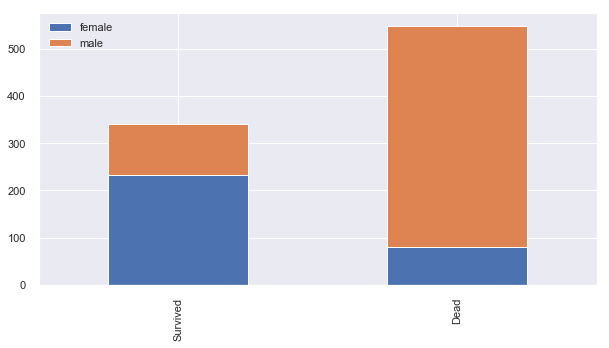

In [65]:
bar_chart('Sex')

- 성별에 따른 생존 여부: 여자가 더 많이 살아남았다.

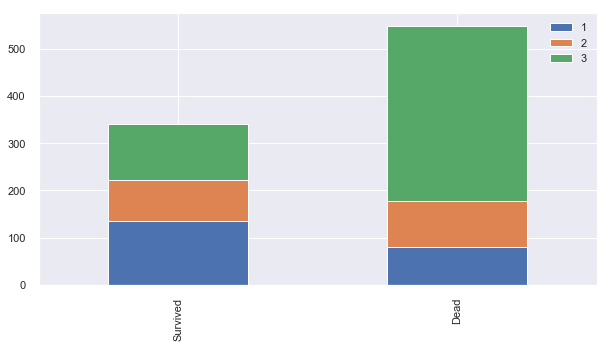

In [66]:
bar_chart('Pclass')

- Pclass에 따른 생존 여부: 
1st class가 더 많이 살아남는 경향, 3rd class가 더 많이 사망하였다.

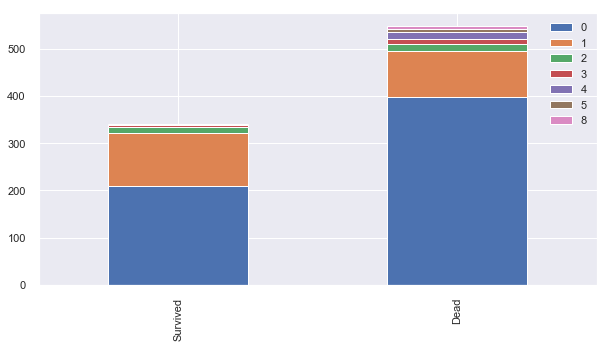

In [67]:
bar_chart('SibSp')

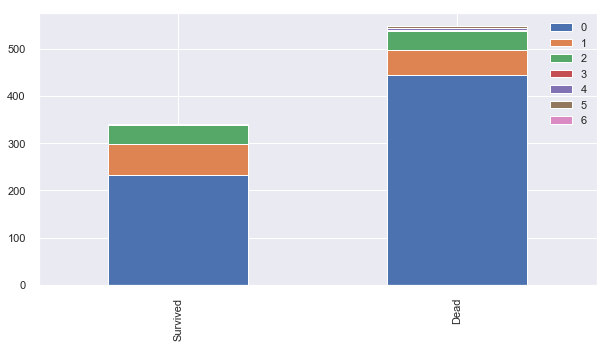

In [68]:
bar_chart('Parch')

In [69]:
- 

SyntaxError: invalid syntax (<ipython-input-69-7d13abcef152>, line 1)

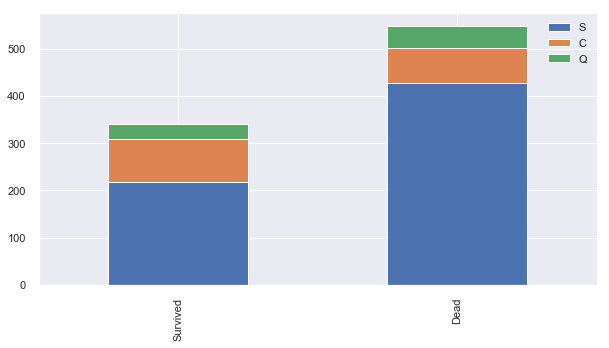

In [70]:
bar_chart('Embarked')

## Feature Engineering
- feature vector, numeric data로 변환시키기
- missing value 처리

In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 HOW TITANIC SANK?
sank from the bow of the ship where third class located 
conclusion, Pclass is key feature for classifier
PClass와 방의 위치가 classification에서 중요한 특징

### 4.2 Name

In [9]:
# Name은 분석에 유의미한 정보 X
# Title은 이름으로 성별과 결혼여부 알 수 있으므로 유의미한 정보라 가정
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
# train

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Countess      1
Lady          1
Ms            1
Mme           1
Capt          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [11]:
# test
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [12]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [14]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

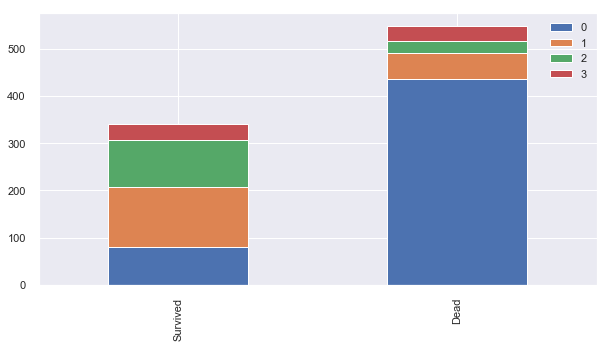

In [13]:
bar_chart('Title')

In [78]:
# Title column 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


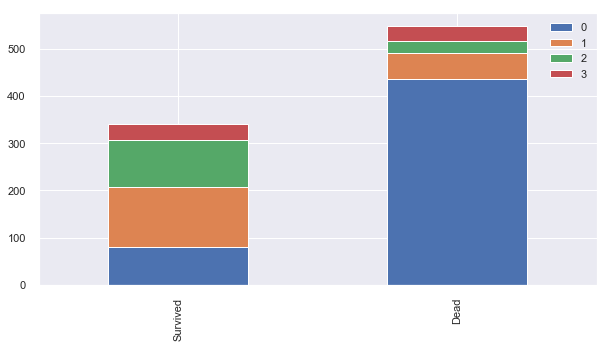

In [80]:
# 0:Mr 1:Miss 2:Mrs
bar_chart('Title')

- 상대적으로 Mr가 Miss Mrs 보다 많이 죽었다

In [149]:
# delete unnecessary feature from dataset
# drop - axis, inplace
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### 4.3 Sex
머신러닝 classifier는 숫자형 데이터만 이용가능
- male:0 female:1

In [150]:
sex_mapping={'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

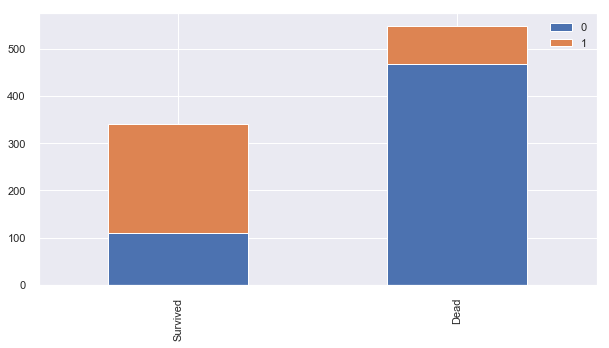

In [151]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age data missing
Let's use Title's median age for missing Age

In [152]:
# fill missing age with age for each title(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [88]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,NaN,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,NaN,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,NaN,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,NaN,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,NaN,14.0,1,0,237736,30.0708,NaN,C,2


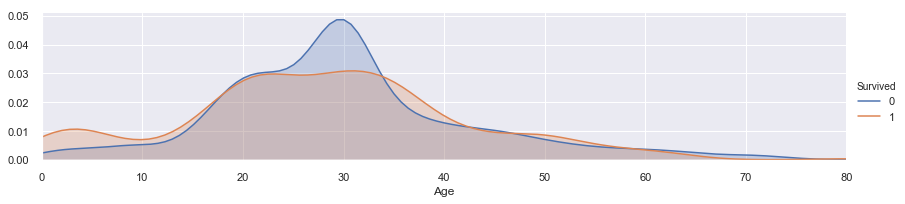

In [89]:
# 연령에 따른 생존 여부
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

In [90]:
- 연령대별로 더 자세히 살펴보자

SyntaxError: invalid syntax (<ipython-input-90-e98414bd0ccb>, line 1)

(0, 20)

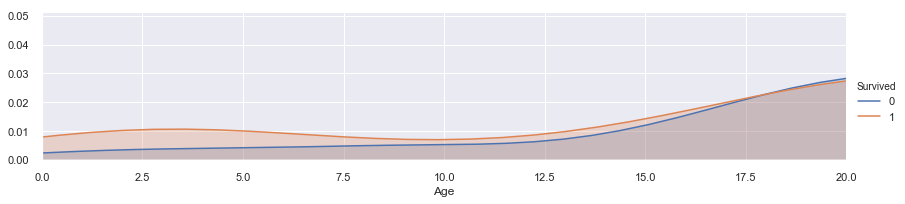

In [91]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 30)

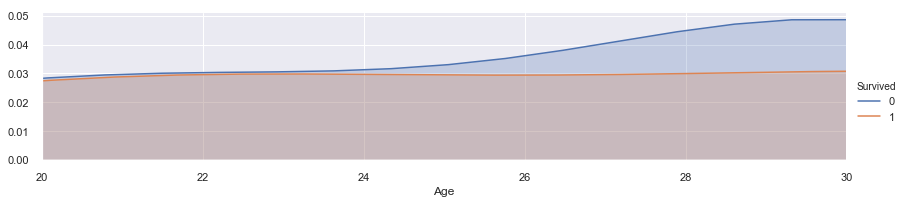

In [92]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 30)

(30, 40)

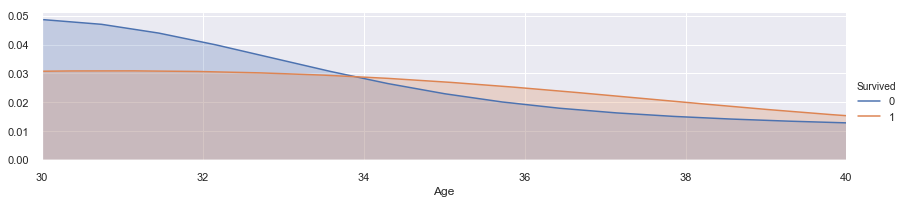

In [93]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(30, 40)

(40, 60)

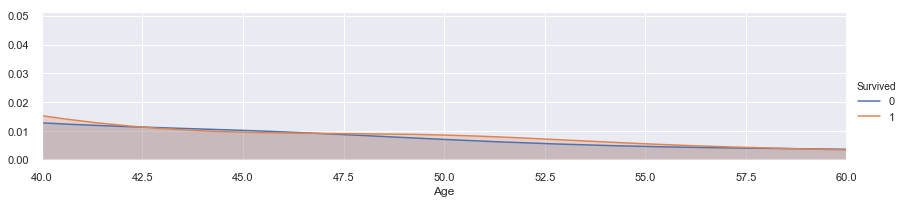

In [94]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 60)

(60, 80.0)

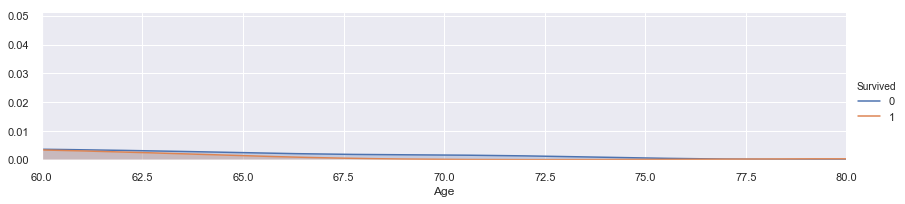

In [95]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(60)

#### 4.4.2 Binning
sequnence 정보가 많은 정보를 주지 못할때 Categorical로 변환
Binning/Converting Numerical Age to Categorical Variable

feature vector map:
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [153]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [154]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


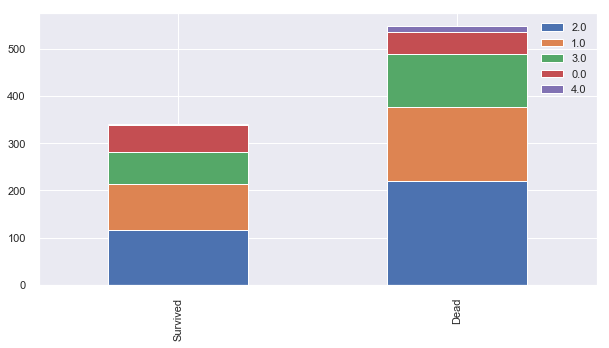

In [98]:
bar_chart('Age')

In [99]:
- 0 어린이 조금 더 많이 생존, 4 62세 이상 거의 다 사망 

SyntaxError: invalid syntax (<ipython-input-99-b151961edfe8>, line 1)

### 4.5 Embarked
- 탑승 도시 - 부유한 vs 가난한 도시 -> Pclass와 상관있을 수 있다 가정

In [155]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

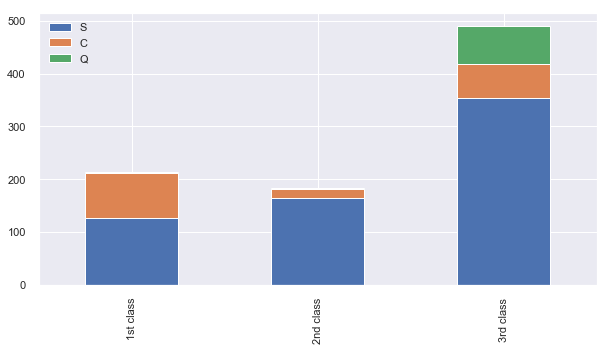

In [156]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- Q - 1등급에 거의 없다
- S - 모든 클래스의 50% 이상 -> embark가 missing인 경우 S로 써도 무방하다
more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark
more than 50% of 3rd class are from S embark

In [157]:
# fill out missing embark with S embark
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [158]:
train.info()    # non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [159]:
# convert to numeric
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [160]:
### 4.6 Fare

In [161]:
# fill missing Fare with median fare for each Pclass
# train.groupby('Pclass')
# transform()
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


(0, 20)

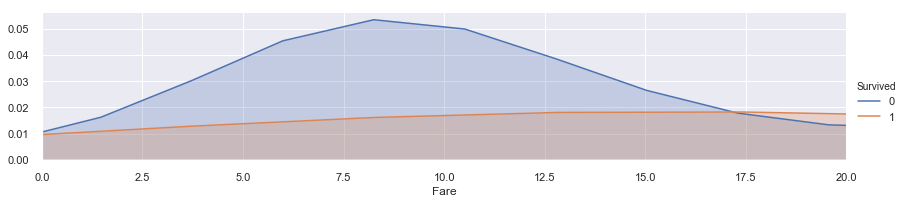

In [162]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

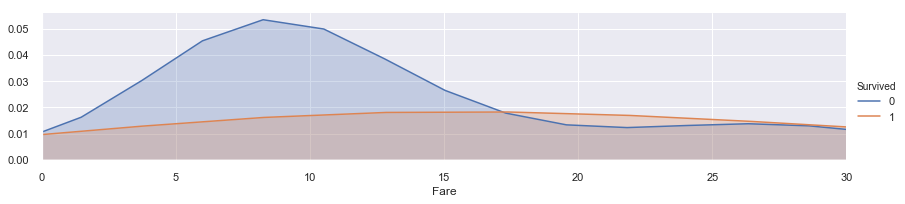

In [110]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

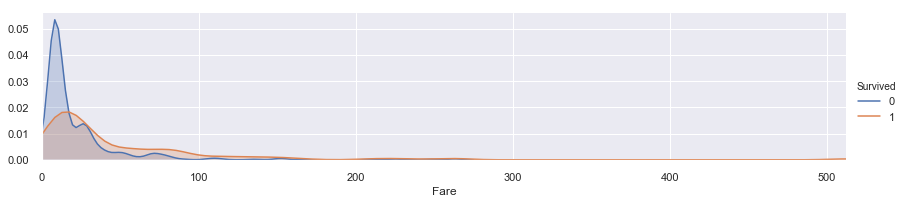

In [163]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

- 더 비싼 Fare 많이 생존 경향

In [164]:
# Convert to numeric

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [165]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [115]:
### 4.7 Cabin

In [166]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
F2             3
D              3
C22 C26        3
B58 B60        2
B49            2
D36            2
E67            2
C78            2
C126           2
F4             2
D35            2
B28            2
C2             2
B20            2
B22            2
C68            2
D26            2
B35            2
B77            2
C93            2
E44            2
D20            2
C83            2
F G73          2
E8             2
              ..
A20            1
E50            1
D45            1
B101           1
F G63          1
C86            1
C90            1
D50            1
E31            1
D48            1
E77            1
C95            1
B38            1
D47            1
C110           1
E36            1
B37            1
C118           1
B4             1
A7             1
C45            1
D11            1
C62 C64        1
B41            1
A24            1
F38            1
C30            1
B82 B84       

In [117]:
- 알파벳과 숫자의 결합형태

SyntaxError: invalid syntax (<ipython-input-117-58509eebbfbe>, line 1)

In [167]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

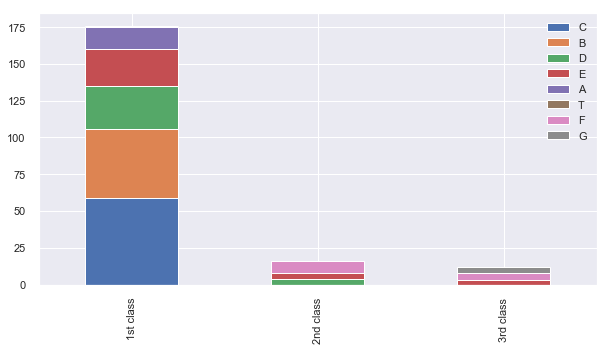

In [168]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- 3등급에 ABCDE 없음

In [170]:
# feature scaling
# 남자 - 여자 차이 VS 10달러 - 20달러 차이
# 후자를 더 크게 반영하므로 
# 범위를 반영하여 소숫점으로  숫자지정
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [171]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [172]:
# 배에 혼자 탔는지, 가족과 함께 탔는지가 중요하므로 하나의 변수로 만들자
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

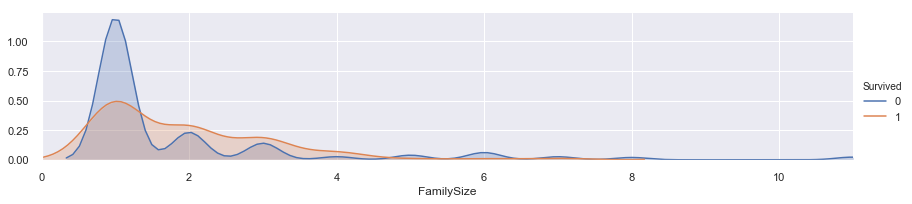

In [173]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [127]:
- 혼자 아닐때 더 많이 생존

SyntaxError: invalid syntax (<ipython-input-127-180a264ae361>, line 1)

In [174]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,NaN,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,NaN,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,NaN,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,NaN,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,NaN,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [175]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [176]:
# 훈련 데이터셋과 target dataset(y변수) 분리
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [177]:
# 숫자로 구성된 feature 벡터 가지고 있으면 ML 가능
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [133]:
## 5. Modeling

In [178]:
#importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Description of actual used features
- Survived 사망 0 생존 1
- Sex 남성 0 여성 1
- Age
- Fare
- Cabin
- Pclass
- Embarked
- Familysize
- Age.Group
- Title

In [184]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [ ]:
### 6.2 Cross Validation (K-fold)

In [179]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#### 6.2.1 kNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors =)

In [ ]:
#### 6.2.2 Decision Tree

In [185]:
# k-fold crossvalidation
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring=scoring)

In [186]:
# Decision Tree score
print(score)

[0.76666667 0.83146067 0.76404494 0.76404494 0.88764045 0.75280899
 0.82022472 0.82022472 0.74157303 0.79775281]


In [187]:
round(np.mean(score)*100,2)

79.46

##### 6.2.2 Decision Tree (improved)

In [ ]:
- Title
# master and royal title tend to more survived than other male titles

In [6]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
F33            3
E101           3
C22 C26        3
E121           2
C52            2
C123           2
B22            2
C2             2
F G73          2
B5             2
B51 B53 B55    2
B77            2
C65            2
E44            2
D26            2
F4             2
E24            2
C126           2
E25            2
C83            2
D20            2
E33            2
B35            2
C93            2
C68            2
              ..
E58            1
A20            1
B102           1
A19            1
B101           1
D11            1
E17            1
E40            1
E46            1
D30            1
B38            1
C103           1
A36            1
B41            1
D56            1
E68            1
C99            1
C46            1
C95            1
D48            1
D45            1
B69            1
C110           1
D28            1
D50            1
C70            1
C32            1
C62 C64       